C:\Users\gwp16\AppData\Local\Temp\ipykernel_33588\2502009536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Cumulative Points'] = season_data.groupby('Driver ID')['Points'].cumsum()


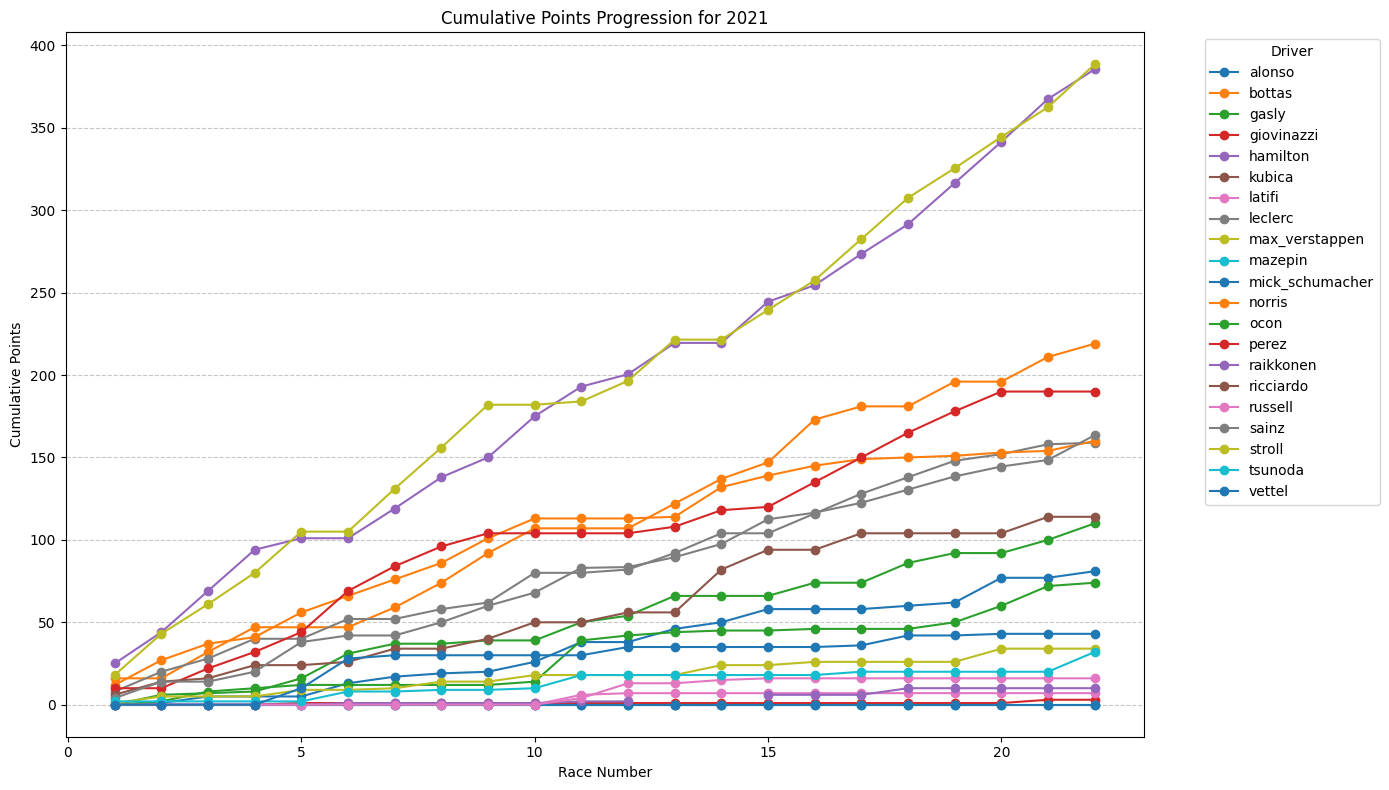

In [16]:
from matplotlib import pyplot as plt
import pandas as pd

def plot_driver_cumulative_progression(data, year):
    season_data = data[data['Year'] == year]

    season_data['Cumulative Points'] = season_data.groupby('Driver ID')['Points'].cumsum()

    pivot_data = season_data.pivot(index='Round', columns='Driver ID', values='Cumulative Points')

    plt.figure(figsize=(14, 8))
    for driver in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[driver], marker='o', label=driver)

    plt.xlabel('Race Number')
    plt.ylabel('Cumulative Points')
    plt.title(f'Cumulative Points Progression for {year}')
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'Cumulative_Points_Progression_{year}.png')
    
# def plot_driver_progression(data, driver_ID, year):
#     # Filter data for the specific driver and year
#     driver_data = data[(data['Driver ID'] == driver_ID) & (data['Year'] == year)]
#     
#     # Sort by race order
#     driver_data = driver_data.sort_values(by='Round')  # Assuming 'Race Number' column exists
# 
#     # Plot a bar chart
#     plt.figure(figsize=(12, 6))
#     plt.bar(driver_data['Round'], driver_data['Points'], color='skyblue', edgecolor='black')
# 
#     # Add labels and title
#     plt.xlabel('Race Number')
#     plt.ylabel('Points Scored')
#     plt.title(f'Points Progression for Lewis Hamilton in {year}')
#     plt.xticks(driver_data['Round'])  # Ensure each race number is labeled
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
# 
#     # Show the plot
#     plt.tight_layout()
#     plt.show()

data = pd.read_csv('merged_data/merged_data.csv')
plot_driver_cumulative_progression(data, 2021)



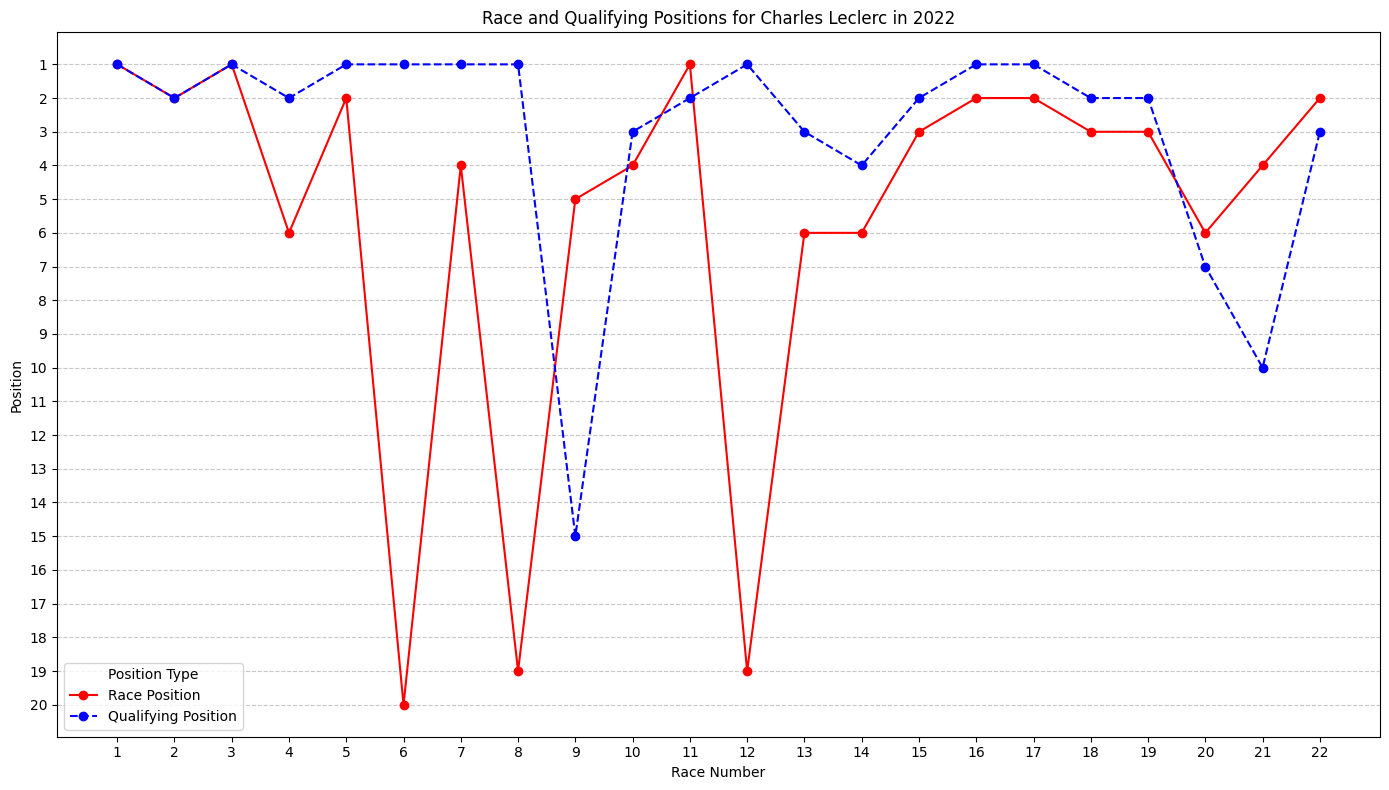

In [30]:
def plot_driver_positions(data, driver_name, year):
    driver_data = data[(data['Driver ID'] == driver_name) & (data['Year'] == year)]
    driver_data = driver_data.sort_values(by='Round')
    
    plt.figure(figsize=(14, 8))
    plt.plot(driver_data['Round'], driver_data['Race Position'], label='Race Position', marker='o', linestyle='-', color='red')
    plt.plot(driver_data['Round'], driver_data['Quali Position'], label='Qualifying Position', marker='o', linestyle='--', color='blue')

    plt.xlabel('Race Number')
    plt.ylabel('Position')
    plt.title(f'Race and Qualifying Positions for Charles Leclerc in {year}')
    plt.xticks(driver_data['Round'])
    plt.legend(title='Position Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.yticks(range(1, 21))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f'Plots/Race_and_Quali_Comp.png')
    # plt.show()
    
plot_driver_positions(data, "leclerc", 2022)